In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

housing_data = pd.read_csv("/Users/kachu/Desktop/DS/housing.csv")        
print(housing_data.head())

/Users/kachu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [2]:
# Importing necessary libraries
import numpy as np # Used for numerical operations, especially on arrays and matrices.
import pandas as pd # Essential for data processing and reading CSV files.
import matplotlib.pyplot as plt # For plotting graphs and charts.
import seaborn as sns # Provides a high-level interface for drawing attractive and informative statistical graphics.
from sklearn.impute import KNNImputer


# Identify which cells have null values
print(housing_data.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [3]:
# Tells the size of the 2d array/tuple
print("Dimensions :", housing_data.shape)

# Calculate the % of missing data
print("Percentage of nulls for column `total_bedrooms` :", housing_data["total_bedrooms"].isnull().sum()/housing_data.shape[0]*100)




Dimensions : (20640, 10)
Percentage of nulls for column `total_bedrooms` : 1.002906976744186


In [4]:
# Steps to handle missing data
## 1. Identify columns which has missing data as separate data frame
## 2. Use the KNNImputer to add missing data to this data frame
## 3. Convert the imputer output array back to dataframe using column names from step #1
## 4. Overlay the new columns which doesn't have any missing data on original data


## 1. Identify columns which has missing data as separate data frame

missing_data = housing_data.loc[:,housing_data.isnull().any()]

## 2. Use the KNNImputer to add missing data to this data frame

# Initializing KNNImputer with 3 neighbors
imputer = KNNImputer(n_neighbors=3)

# Applying imputation returns nd array
transformed_data_array = imputer.fit_transform(missing_data)

## 3. Convert the imputer output array back to dataframe using column names from step #1

transformed_data = pd.DataFrame(data = transformed_data_array, columns = missing_data.columns)
transformed_data.isnull().sum()

## 4. Overlay the new columns which doesn't have any missing data on original data

for column in missing_data.columns: 
    housing_data[column] = transformed_data.replace(housing_data[column],housing_data[column])

print("After imputation : ", housing_data.isnull().sum())

After imputation :  longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#EDA

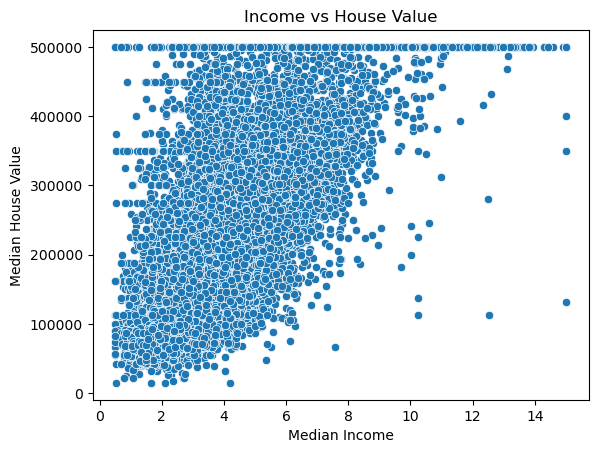

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Scatter plot of 'median_income' vs 'median_house_value'
sns.scatterplot(x='median_income', y='median_house_value', data=housing_data)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Income vs House Value')
plt.show()

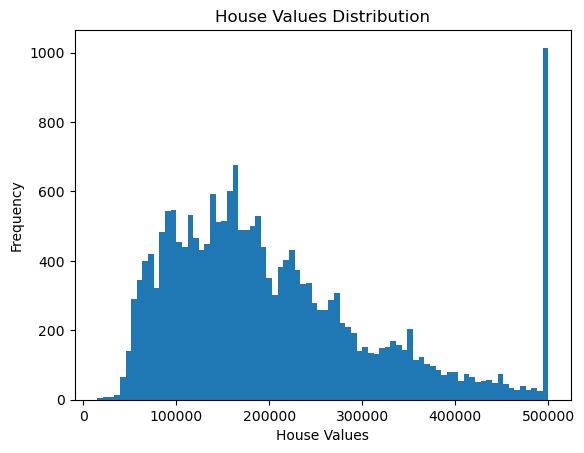

In [9]:
#visualizing the relationship between Median house value and median income
plt.hist(housing_data["median_house_value"], bins=80)
plt.xlabel("House Values")
plt.ylabel("Frequency")
plt.title("House Values Distribution")
plt.show()

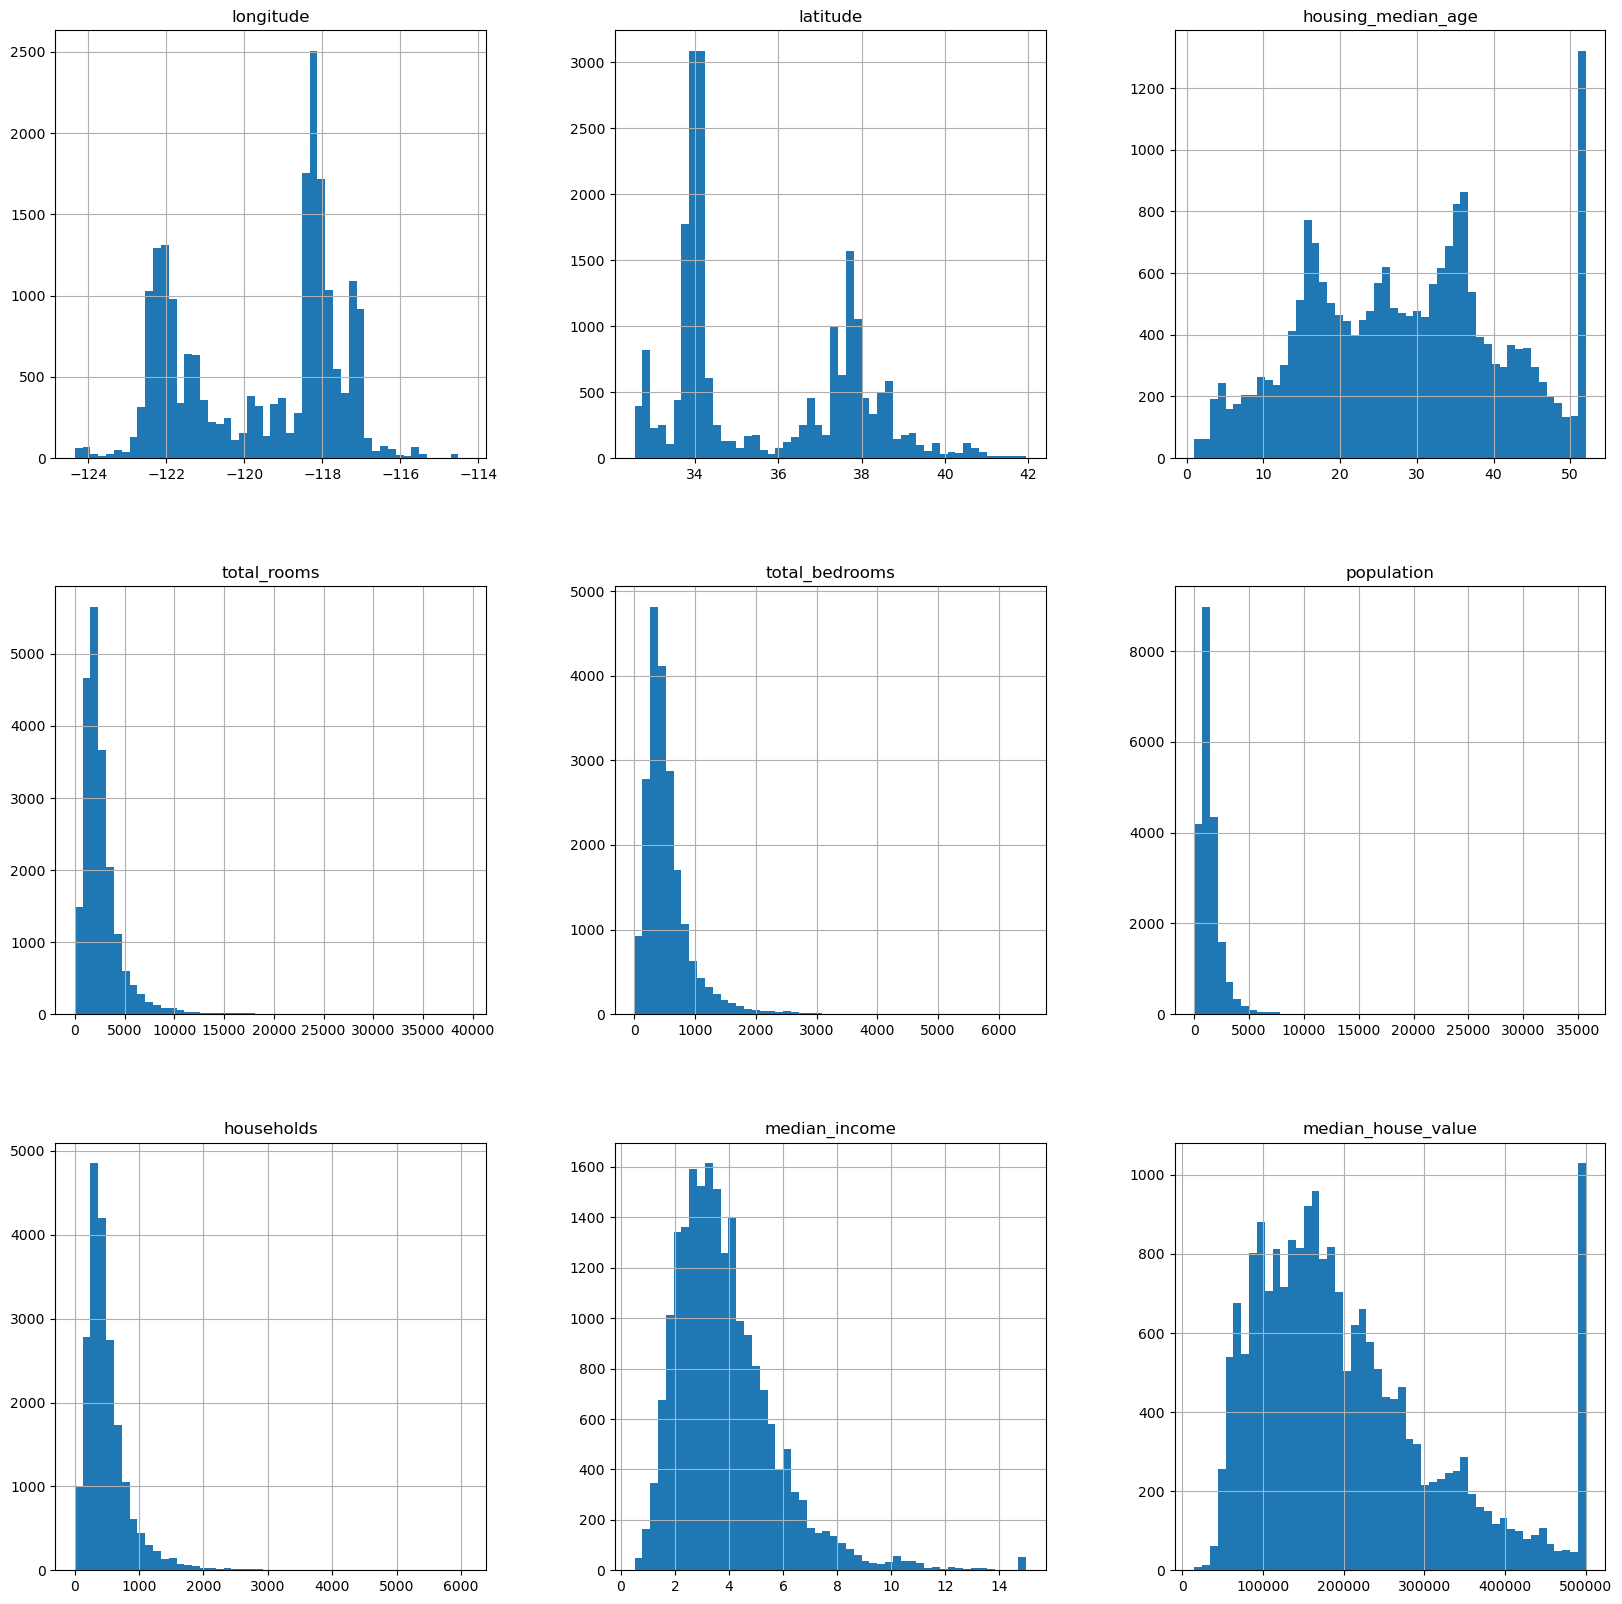

In [10]:
# Generating histograms for all numerical columns in the dataset
# 'bins=50' sets the number of bins in the histogram
# 'figsize=(20,20)' specifies the size of the figure (width, height) in inches
housing_data.hist(bins=50, figsize=(20,20))

# The histograms help in visualizing the distribution of each numerical column
# It's useful to notice any outliers, as indicated in the comment
# Adjusting the number of bins can provide different perspectives on the data's distribution
plt.show() # Displays the plot

# Notice the outlier on the right and adjust bins to to visual and understand the peaks.

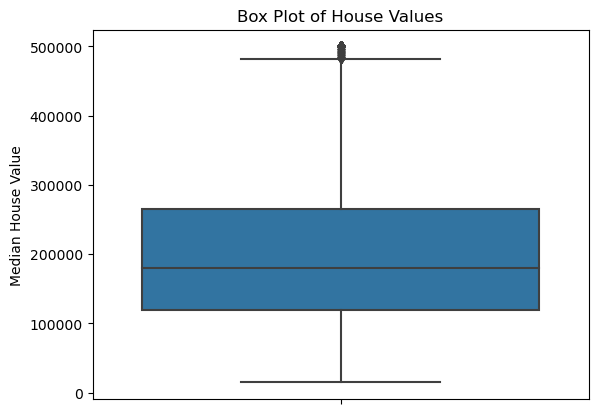

In [12]:
#visualizing the distribution of a variable and identifying outliers
sns.boxplot(y='median_house_value', data=housing_data)
plt.ylabel('Median House Value')
plt.title('Box Plot of House Values')
plt.show()

In [15]:
distinct_values = housing_data['ocean_proximity'].unique()
print(distinct_values)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


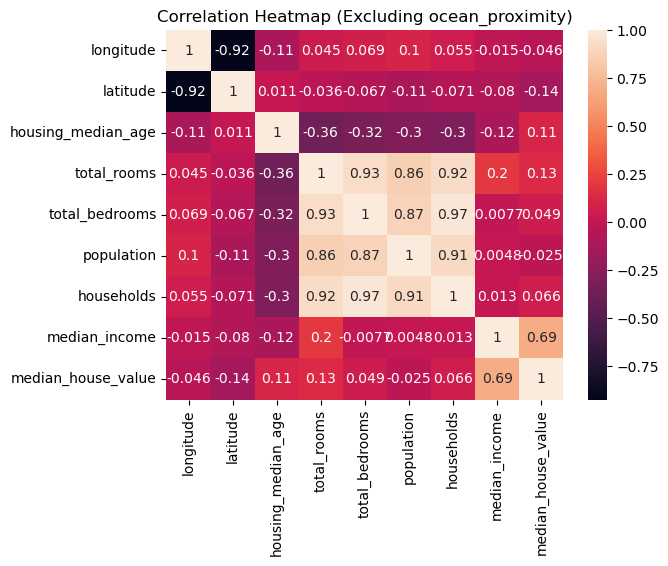

In [16]:
numeric_data = housing_data.drop(columns=['ocean_proximity'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix using a heatmap in Seaborn
sns.heatmap(correlation_matrix, annot=True)

# Set the title for the heatmap
plt.title('Correlation Heatmap (Excluding ocean_proximity)')

# Display the plot
plt.show()

It's noteworthy that multiple features, such as total_rooms, total_bedrooms, population, and households, exhibit a strong correlation with each other. High inter-correlation means that two (or more) features provide redundant information.

Consequently, it would be intriguing to explore whether eliminating some of these features impacts the performance of the model.

Each of these visualization types serves a specific purpose and helps in gaining insights from the data. Scatter plots and histograms are great for understanding individual features, box plots are useful for spotting outliers, and heatmaps effectively visualize the relationship between multiple variables.

# Using Linear Regression to Predict Home SellingPrice

In [19]:
# Importing necessary libraries
import numpy as np # Used for numerical operations, especially on arrays and matrices.
import pandas as pd # Essential for data processing and reading CSV files.
import matplotlib.pyplot as plt # For plotting graphs and charts.
import seaborn as sns # Provides a high-level interface for drawing attractive and informative statistical graphics.
import sklearn
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



# Select only numeric columns for imputation
numeric_columns = housing_data.select_dtypes(include=['float64']).columns
missing_data = housing_data[numeric_columns].loc[:, housing_data[numeric_columns].isnull().any()]

# Check if there are any missing values in the selected numeric columns
if missing_data.isnull().values.any():
    # Impute missing values using KNNImputer
    imputer = KNNImputer(n_neighbors=3)
    transformed_data_array = imputer.fit_transform(missing_data)
    transformed_data = pd.DataFrame(data=transformed_data_array, columns=missing_data.columns)

    # Replace missing values in original DataFrame with imputed values
    for column in missing_data.columns:
        housing_data[column] = transformed_data[column]

print(housing_data.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [20]:

# We will add some features and remove some to see the impact on correlation

housing_data["rooms_per_household"] = housing_data["total_rooms"]/housing_data["households"]
housing_data["bedrooms_per_room"] = housing_data["total_bedrooms"]/housing_data["total_rooms"]
housing_data["population_per_household"] = housing_data["population"]/housing_data["households"]
housing_data["coords"] = housing_data["longitude"]/housing_data["latitude"]

# We will remove total_rooms, total_bedrooms, population, households, latitude and longitude

housing_data = housing_data.drop("total_rooms", axis=1)
housing_data = housing_data.drop("total_bedrooms", axis=1)
housing_data = housing_data.drop("households", axis=1)
housing_data = housing_data.drop("population", axis=1)
housing_data = housing_data.drop("longitude", axis=1)
housing_data = housing_data.drop("latitude", axis=1)

# Categorical Data Encoding using one hot encoding method

housing_data =  pd.get_dummies(housing_data, columns=['ocean_proximity'])

# Use List Comprehension to change columns names to remove special char/space to avoid issues
housing_data.columns = [c.lower().replace(' ','_').replace('<','_') for c in housing_data.columns]

housing_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   housing_median_age          20640 non-null  float64
 1   median_income               20640 non-null  float64
 2   median_house_value          20640 non-null  float64
 3   rooms_per_household         20640 non-null  float64
 4   bedrooms_per_room           20640 non-null  float64
 5   population_per_household    20640 non-null  float64
 6   coords                      20640 non-null  float64
 7   ocean_proximity__1h_ocean   20640 non-null  bool   
 8   ocean_proximity_inland      20640 non-null  bool   
 9   ocean_proximity_island      20640 non-null  bool   
 10  ocean_proximity_near_bay    20640 non-null  bool   
 11  ocean_proximity_near_ocean  20640 non-null  bool   
dtypes: bool(5), float64(7)
memory usage: 1.2 MB


In [21]:
# Select your features and target variable
X = housing_data[['housing_median_age','median_income','rooms_per_household','bedrooms_per_room','population_per_household','coords','ocean_proximity__1h_ocean','ocean_proximity_inland','ocean_proximity_island','ocean_proximity_near_bay','ocean_proximity_near_ocean']] 
y = housing_data['median_house_value']

# Split the data 70:30 - 70% will be used to train the model and 30% will be used to test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)


# Using Scikit-learn liner regression

# Create a linear regression model
model = LinearRegression()

# List all available hyper parameters
print("Hyper parameters:", model.get_params())

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
# R^2 score - value closer to 1 indicates model is close to perfection. 
print('-----------------------------')
print("Linear Regression Test Accuracy:",model.score(X_test,y_test))
print("R^2 Accuracy:", r2_score(y_test, predictions))
print(pd.DataFrame({'Actual':y_test, 'Predicted':predictions}))
print("Root Mean Squared Error:", mean_squared_error(y_test, predictions)**(0.5))
print('-----------------------------')

Hyper parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
-----------------------------
Linear Regression Test Accuracy: 0.5539152802688387
R^2 Accuracy: 0.5539152802688387
         Actual      Predicted
20046   47700.0  104715.540790
3024    45800.0   90644.833269
15663  500001.0  215552.381354
20484  218600.0  283365.007591
9814   278000.0  245112.099874
...         ...            ...
17505  237500.0  209304.634501
13512   67300.0   74640.438821
10842  218400.0  215452.143080
16559  119400.0  125811.202747
5786   209800.0  201373.682871

[6192 rows x 2 columns]
Root Mean Squared Error: 76518.2387493371
-----------------------------


# Use Random Forrest Regression

In [29]:
# Reading the dataset

# Select only numeric columns for imputation

housing_data = pd.read_csv("/Users/kachu/Desktop/DS/housing.csv")        
missing_data = housing_data.loc[:,housing_data.isnull().any()]
imputer = KNNImputer(n_neighbors=3)
transformed_data_array = imputer.fit_transform(missing_data)
transformed_data = pd.DataFrame(data = transformed_data_array, columns = missing_data.columns)
for column in missing_data.columns: 
    housing_data[column] = transformed_data.replace(housing_data[column],housing_data[column])


# We will add some features and remove some to see the impact on correlation

housing_data["rooms_per_household"] = housing_data["total_rooms"]/housing_data["households"]
housing_data["bedrooms_per_room"] = housing_data["total_bedrooms"]/housing_data["total_rooms"]
housing_data["population_per_household"] = housing_data["population"]/housing_data["households"]
housing_data["coords"] = housing_data["longitude"]/housing_data["latitude"]

# We will remove total_rooms, total_bedrooms, population, households, latitude and longitude

housing_data = housing_data.drop("total_rooms", axis=1)
housing_data = housing_data.drop("total_bedrooms", axis=1)
housing_data = housing_data.drop("households", axis=1)
housing_data = housing_data.drop("population", axis=1)
housing_data = housing_data.drop("longitude", axis=1)
housing_data = housing_data.drop("latitude", axis=1)

# Categorical Data Encoding using one hot encoding method

housing_data =  pd.get_dummies(housing_data, columns=['ocean_proximity'])

# Use List Comprehension to change columns names to remove special char/space to avoid issues
housing_data.columns = [c.lower().replace(' ','_').replace('<','_') for c in housing_data.columns]

housing_data.info()

# Select your features and target variable
X = housing_data[['housing_median_age','median_income','rooms_per_household','bedrooms_per_room','population_per_household','coords','ocean_proximity__1h_ocean','ocean_proximity_inland','ocean_proximity_island','ocean_proximity_near_bay','ocean_proximity_near_ocean']] 
y = housing_data['median_house_value']

# Split the data 70:30 - 70% will be used to train the model and 30% will be used to test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)


# Using Scikit-learn liner regression

# Create a random forest regressor
# Optional params - n_estimators=10,random_state=10 => gives accurary of 0.75
# Default accurary => 0.77
model = RandomForestRegressor()

# List all available hyper parameters
print("Hyper parameters:", model.get_params())


# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
# R^2 score - value closer to 1 indicates model is close to perfection. 
print('-----------------------------')
print("Random Forest Regressor Test Accuracy:",model.score(X_test,y_test))
print("R^2 Accuracy:", r2_score(y_test, predictions))
print(pd.DataFrame({'Actual':y_test, 'Predicted':predictions}))
print("Root Mean Squared Error:", mean_squared_error(y_test, predictions)**(0.5))
print('-----------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   housing_median_age          20640 non-null  float64
 1   median_income               20640 non-null  float64
 2   median_house_value          20640 non-null  float64
 3   rooms_per_household         20640 non-null  float64
 4   bedrooms_per_room           20640 non-null  float64
 5   population_per_household    20640 non-null  float64
 6   coords                      20640 non-null  float64
 7   ocean_proximity__1h_ocean   20640 non-null  bool   
 8   ocean_proximity_inland      20640 non-null  bool   
 9   ocean_proximity_island      20640 non-null  bool   
 10  ocean_proximity_near_bay    20640 non-null  bool   
 11  ocean_proximity_near_ocean  20640 non-null  bool   
dtypes: bool(5), float64(7)
memory usage: 1.2 MB
Hyper parameters: {'bootstrap': True, 'ccp_a

# Using xgboost's XGBRegressor

In [34]:
import numpy as np # Used for numerical operations, especially on arrays and matrices.
import pandas as pd # Essential for data processing and reading CSV files.
import matplotlib.pyplot as plt # For plotting graphs and charts.
import seaborn as sns # Provides a high-level interface for drawing attractive and informative statistical graphics.
import sklearn
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

housing_data = pd.read_csv("/Users/kachu/Desktop/DS/housing.csv")        
missing_data = housing_data.loc[:,housing_data.isnull().any()]
imputer = KNNImputer(n_neighbors=3)
transformed_data_array = imputer.fit_transform(missing_data)
transformed_data = pd.DataFrame(data = transformed_data_array, columns = missing_data.columns)
for column in missing_data.columns: 
    housing_data[column] = transformed_data.replace(housing_data[column],housing_data[column])


# We will add some features and remove some to see the impact on correlation

housing_data["rooms_per_household"] = housing_data["total_rooms"]/housing_data["households"]
housing_data["bedrooms_per_room"] = housing_data["total_bedrooms"]/housing_data["total_rooms"]
housing_data["population_per_household"] = housing_data["population"]/housing_data["households"]
housing_data["coords"] = housing_data["longitude"]/housing_data["latitude"]

# We will remove total_rooms, total_bedrooms, population, households, latitude and longitude

housing_data = housing_data.drop("total_rooms", axis=1)
housing_data = housing_data.drop("total_bedrooms", axis=1)
housing_data = housing_data.drop("households", axis=1)
housing_data = housing_data.drop("population", axis=1)
housing_data = housing_data.drop("longitude", axis=1)
housing_data = housing_data.drop("latitude", axis=1)

# Categorical Data Encoding using one hot encoding method

housing_data =  pd.get_dummies(housing_data, columns=['ocean_proximity'])

# Use List Comprehension to change columns names to remove special char/space to avoid issues
housing_data.columns = [c.lower().replace(' ','_').replace('<','_') for c in housing_data.columns]

housing_data.info()

# Select your features and target variable
X = housing_data[['housing_median_age','median_income','rooms_per_household','bedrooms_per_room','population_per_household','coords','ocean_proximity__1h_ocean','ocean_proximity_inland','ocean_proximity_island','ocean_proximity_near_bay','ocean_proximity_near_ocean']] 
y = housing_data['median_house_value']

# Split the data 70:30 - 70% will be used to train the model and 30% will be used to test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)


# Using Scikit-learn liner regression

# Create a XGBRegressor
model = XGBRegressor()

# List all available hyper parameters
print("Hyper parameters:", model.get_params())


# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
# R^2 score - value closer to 1 indicates model is close to perfection. 
print('-----------------------------')
print("XGBRegressor Test Accuracy:",model.score(X_test,y_test))
print("R^2 Accuracy:", r2_score(y_test, predictions))
print(pd.DataFrame({'Actual':y_test, 'Predicted':predictions}))
print("Root Mean Squared Error:", mean_squared_error(y_test, predictions)**(0.5))
print('-----------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   housing_median_age          20640 non-null  float64
 1   median_income               20640 non-null  float64
 2   median_house_value          20640 non-null  float64
 3   rooms_per_household         20640 non-null  float64
 4   bedrooms_per_room           20640 non-null  float64
 5   population_per_household    20640 non-null  float64
 6   coords                      20640 non-null  float64
 7   ocean_proximity__1h_ocean   20640 non-null  bool   
 8   ocean_proximity_inland      20640 non-null  bool   
 9   ocean_proximity_island      20640 non-null  bool   
 10  ocean_proximity_near_bay    20640 non-null  bool   
 11  ocean_proximity_near_ocean  20640 non-null  bool   
dtypes: bool(5), float64(7)
memory usage: 1.2 MB
Hyper parameters: {'objective': 'reg:squared

In [33]:
#pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
